<a href="https://colab.research.google.com/github/isDaisyorDaisy/proejcts/blob/main/stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']
new_universe = np.repeat(universe, 2)
union_csv = []
cash1 = 5000000
cash2 = 5000000
cash3 = 5000000
cash4 = 5000000
t = 5


def get_data_frame(company_name):
    df = pd.read_csv('{0}.csv'.format(company_name), usecols=[4, 5], header=0)
    return df


for name in universe:
    name_csv = []
    name_csv = get_data_frame(name)
    union_csv.append(name_csv)

union_data = pd.concat(union_csv, axis=1)
name_list = np.array(union_data.columns.values)
union_data_2 = pd.DataFrame(union_data.values, columns=[new_universe, ['Close', 'Adj Close']*10])

mean = union_data_2.iloc[:,[0,2,4,6,8,10,12,14,16,18]].mean(axis=1)

daily_mean = np.array(mean)




# print(union_data_2)


IBM_csv = pd.read_csv('IBM.csv',usecols=[4,5])
MSFT_csv = pd.read_csv('MSFT.csv',usecols=[4,5])
GOOG_csv = pd.read_csv('GOOG.csv',usecols=[4,5])
AAPL_csv = pd.read_csv('AAPL.csv',usecols=[4,5])
AMZN_csv = pd.read_csv('AMZN.csv',usecols=[4,5])
FB_csv = pd.read_csv('FB.csv',usecols=[4,5])
SAP_csv = pd.read_csv('SAP.csv',usecols=[4,5])
TSLA_csv = pd.read_csv('TSLA.csv',usecols=[4,5])
ORCL_csv = pd.read_csv('ORCL.csv',usecols=[4,5])
NFLX_csv = pd.read_csv('NFLX.csv',usecols=[4,5])


def get_dividend(company):
    dividend_list = []
    for i in range(len(company['Close'])):
        if i == 0:
            continue
        else:
            dividend = company['Close'][i] * abs(
                (company['Close'][i - 1]) / (company['Close'][i]) - (company['Adj Close'][i - 1]) / (
                company['Adj Close'][i]))
            dividend_list.append(dividend)
            dividend_df = pd.DataFrame(dividend_list)
    return dividend_df


IBM_dividend = get_dividend(IBM_csv)
MSFT_dividend = get_dividend(MSFT_csv)
GOOG_dividend = get_dividend(GOOG_csv)
AAPL_dividend = get_dividend(AAPL_csv)
AMZN_dividend = get_dividend(AMZN_csv)
FB_dividend = get_dividend(FB_csv)
SAP_dividend = get_dividend(SAP_csv)
NFLX_dividend = get_dividend(NFLX_csv)
ORCL_dividend = get_dividend(ORCL_csv)
TSLA_dividend = get_dividend(TSLA_csv)
df_dividend_1 = pd.concat([IBM_dividend, MSFT_dividend, GOOG_dividend, AAPL_dividend, AMZN_dividend,
                         FB_dividend, NFLX_dividend, TSLA_dividend, ORCL_dividend, SAP_dividend], axis=1)
df_dividend = pd.DataFrame(df_dividend_1.values, columns=universe)
# print(df_dividend)



def split_cash(cash_in, list_in):
    split_money = [cash_in] * 5
    split = pd.Series(split_money, index=list_in)
    global cash
    cash = 0
    return split/5


def portfolio_low(union_data_in, t_in, i_in):
    u_data_temp = union_data_in.iloc[(t_in * i_in):(t_in * (i_in + 2))]
    skip_line = u_data_temp.shift(t_in)
    ss = (u_data_temp - skip_line) / u_data_temp
    portfolio_value = ss.loc[t_in * (i_in + 2) - 1, pd.IndexSlice[:, 'Adj Close']].droplevel(1)
    return np.array(portfolio_value.sort_values().index)[:5]


def portfolio_high(union_data_in, t_in, i_in):
    u_data_temp = union_data_in.iloc[(t_in * i_in):(t_in * (i_in + 2))]
    skip_line = u_data_temp.shift(t_in)
    ss = (u_data_temp - skip_line) / u_data_temp
    portfolio_value = ss.loc[t_in * (i_in + 2) - 1, pd.IndexSlice[:, 'Adj Close']].droplevel(1)
    return np.array(portfolio_value.sort_values().index)[5:]


def trading_strategy_low(cash_in):
    cash_left = 0
    t = 5
    for i in range(49):
        if i == 0:
            five_close = union_data_2.loc[pd.IndexSlice[0], pd.IndexSlice[universe[:5], 'Close']].droplevel(1)
            five_money = split_cash(cash_in, universe[:5])
            five_shares = five_money // five_close
            five_dividend = df_dividend.loc[pd.IndexSlice[1:4], pd.IndexSlice[universe[:5]]].sum()
            # print(five_dividend)
            five_left = five_money % five_close
            cash_left += sum(five_left)
            five_close = union_data_2.loc[pd.IndexSlice[4], pd.IndexSlice[universe[:5], 'Close']].droplevel(1)
            cash_s = five_close * five_shares + cash_left + five_dividend * five_shares
            cash = sum(cash_s)
        else:
            name = portfolio_low(union_data_2, t, i)
            five_close = union_data_2.loc[pd.IndexSlice[t*i], pd.IndexSlice[name, 'Close']].droplevel(1)
            five_money = split_cash(cash, name)
            five_shares = five_money // five_close
            # print(five_shares)
            five_dividend = df_dividend.loc[pd.IndexSlice[t*i + 1:t * (i+1) -1], pd.IndexSlice[name]].sum()
            # print(five_dividend)
            five_left = five_money % five_close
            cash_left += sum(five_left)
            five_close = union_data_2.loc[pd.IndexSlice[t*(i+1)-1], pd.IndexSlice[name, 'Close']].droplevel(1)
            cash_s = five_close * five_shares + cash_left + five_dividend * five_shares
            cash = sum(cash_s)
    return cash


def trading_strategy_high(cash_in):
    cash_left = 0
    t = 5
    for i in range(49):
        if i == 0:
            five_close = union_data_2.loc[pd.IndexSlice[0], pd.IndexSlice[universe[:5], 'Close']].droplevel(1)
            five_money = split_cash(cash_in, universe[:5])
            five_shares = five_money // five_close
            five_dividend = df_dividend.loc[pd.IndexSlice[1:4], pd.IndexSlice[universe[:5]]].sum()
            # print(five_dividend)
            five_left = five_money % five_close
            cash_left += sum(five_left)
            five_close = union_data_2.loc[pd.IndexSlice[4], pd.IndexSlice[universe[:5], 'Close']].droplevel(1)
            cash_s = five_close * five_shares + cash_left + five_dividend * five_shares
            cash = sum(cash_s)
        else:
            name = portfolio_high(union_data_2, t, i)
            five_close = union_data_2.loc[pd.IndexSlice[t*i], pd.IndexSlice[name, 'Close']].droplevel(1)
            five_money = split_cash(cash, name)
            five_shares = five_money // five_close
            # print(five_shares)
            five_dividend = df_dividend.loc[pd.IndexSlice[t*i + 1:t * (i+1) -1], pd.IndexSlice[name]].sum()
            # print(five_dividend)
            five_left = five_money % five_close
            cash_left += sum(five_left)
            five_close = union_data_2.loc[pd.IndexSlice[t*(i+1)-1], pd.IndexSlice[name, 'Close']].droplevel(1)
            cash_s = five_close * five_shares + cash_left + five_dividend * five_shares
            cash = sum(cash_s)
    return cash


def trading_strategy_low_1(cash_in):
    cash_left = 0
    t = 4
    for i in range(250//t - 1):
        if i == 0:
            five_close = union_data_2.loc[pd.IndexSlice[0], pd.IndexSlice[universe[:5], 'Close']].droplevel(1)
            five_money = split_cash(cash_in, universe[:5])
            five_shares = five_money // five_close
            five_dividend = df_dividend.loc[pd.IndexSlice[1:4], pd.IndexSlice[universe[:5]]].sum()
            # print(five_dividend)
            five_left = five_money % five_close
            cash_left += sum(five_left)
            five_close = union_data_2.loc[pd.IndexSlice[4], pd.IndexSlice[universe[:5], 'Close']].droplevel(1)
            cash_s = five_close * five_shares + cash_left + five_dividend * five_shares
            cash = sum(cash_s)
        else:
            name = portfolio_low(union_data_2, t, i)
            five_close = union_data_2.loc[pd.IndexSlice[t*i], pd.IndexSlice[name, 'Close']].droplevel(1)
            five_money = split_cash(cash, name)
            five_shares = five_money // five_close
            # print(five_shares)
            five_dividend = df_dividend.loc[pd.IndexSlice[t*i + 1:t * (i+1) -1], pd.IndexSlice[name]].sum()
            # print(five_dividend)
            five_left = five_money % five_close
            cash_left += sum(five_left)
            five_close = union_data_2.loc[pd.IndexSlice[t*(i+1)-1], pd.IndexSlice[name, 'Close']].droplevel(1)
            cash_s = five_close * five_shares + cash_left + five_dividend * five_shares
            cash = sum(cash_s)
    return cash


def trading_strategy_high_1(cash_in):
    cash_left = 0
    t = 6
    for i in range(250//t - 1):
        if i == 0:
            five_close = union_data_2.loc[pd.IndexSlice[0], pd.IndexSlice[universe[:5], 'Close']].droplevel(1)
            five_money = split_cash(cash_in, universe[:5])
            five_shares = five_money // five_close
            five_dividend = df_dividend.loc[pd.IndexSlice[1:4], pd.IndexSlice[universe[:5]]].sum()
            # print(five_dividend)
            five_left = five_money % five_close
            cash_left += sum(five_left)
            five_close = union_data_2.loc[pd.IndexSlice[4], pd.IndexSlice[universe[:5], 'Close']].droplevel(1)
            cash_s = five_close * five_shares + cash_left + five_dividend * five_shares
            cash = sum(cash_s)
        else:
            name = portfolio_high(union_data_2, t, i)
            five_close = union_data_2.loc[pd.IndexSlice[t*i], pd.IndexSlice[name, 'Close']].droplevel(1)
            five_money = split_cash(cash, name)
            five_shares = five_money // five_close
            # print(five_shares)
            five_dividend = df_dividend.loc[pd.IndexSlice[t*i + 1:t * (i+1) -1], pd.IndexSlice[name]].sum()
            # print(five_dividend)
            five_left = five_money % five_close
            cash_left += sum(five_left)
            five_close = union_data_2.loc[pd.IndexSlice[t*(i+1)-1], pd.IndexSlice[name, 'Close']].droplevel(1)
            cash_s = five_close * five_shares + cash_left + five_dividend * five_shares
            cash = sum(cash_s)
    return cash

print('The testing resuts are showing below:')
print('1.When following the buy-high strategy and the decision interval is 5 days, the last value of MTM is ',trading_strategy_high(cash1))
print()
print('2.When following the buy-low strategy and the decision interval is 5 days, the last value of MTM is ',trading_strategy_low(cash2))
print()
print('3.When following the buy-high strategy and the decision interval is 6 days, the last value of MTM is ',trading_strategy_high_1(cash3))
print()
print('4.When following the buy-low strategy and the decision interval is 4 days, the last value of MTM is ',trading_strategy_low_1(cash4))
print()
print('Explain: We tested the buy-low strategy and the buy-high strategy with a decision interval of 4, 5, 6, and 7 days, respectively, but some of them were not shown in the final code. After comparing the final MTM values, we can see that the buy-high strategy has higher returns than the buy-low strategy. At the same time, the smaller the decision interval, the larger the final MTM value, so smaller decision intervals can lead to higher returns.')


The testing resuts are showing below:
1.When following the buy-high strategy and the decision interval is 5 days, the last value of MTM is  12016094.388020752

2.When following the buy-low strategy and the decision interval is 5 days, the last value of MTM is  11285800.9947316

3.When following the buy-high strategy and the decision interval is 6 days, the last value of MTM is  9687398.922751015

4.When following the buy-low strategy and the decision interval is 4 days, the last value of MTM is  14568562.326140769

Explain: We tested the buy-low strategy and the buy-high strategy with a decision interval of 4, 5, 6, and 7 days, respectively, but some of them were not shown in the final code. After comparing the final MTM values, we can see that the buy-high strategy has higher returns than the buy-low strategy. At the same time, the smaller the decision interval, the larger the final MTM value, so smaller decision intervals can lead to higher returns.


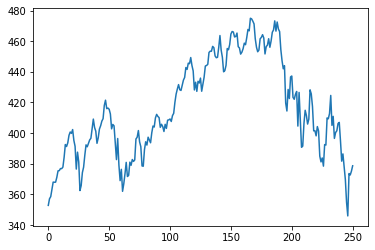

In [ ]:
fig, ax = plt.subplots()
ax.plot(daily_mean)
plt.show()